# understand the basic of applying gpt4o vision
https://cookbook.openai.com/examples/gpt_with_vision_for_video_understanding

another good reference to adjust the parameters of processing video
https://platform.openai.com/docs/guides/vision

In [8]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video, to install !pip install opencv-python
import base64
import time
from openai import OpenAI
import os
import requests

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "<your OpenAI API key if not set as env var>"))

In [9]:
video = cv2.VideoCapture("output_video.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

3870 frames read.


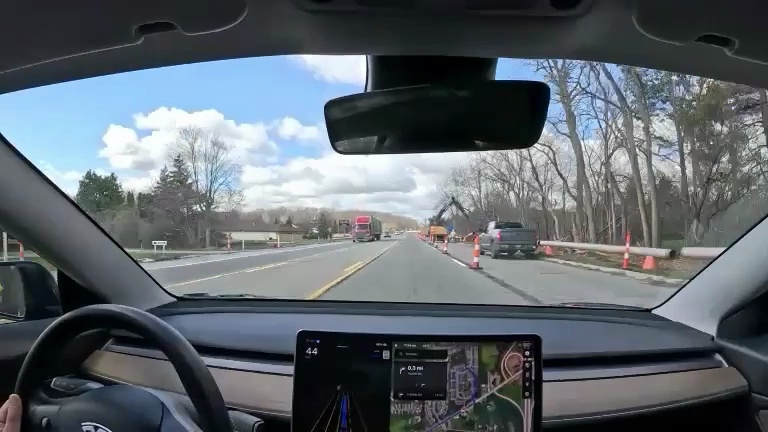

In [10]:
def visualize_clip_ipython(clip):
    display_handle = display(None, display_id=True)  # Create a display handle
    for img in clip:
        # Decode the base64 string back to an image
        img_data = base64.b64decode(img.encode("utf-8"))
        display_handle.update(Image(data=img_data))  # Update the display with the new image
        time.sleep(0.025)  # Adjust the delay as needed

#visualize the first 10 frame
visualize_clip_ipython(base64Frames[:10])

In [11]:
# Assuming base64Frames is already populated with base64-encoded frames
base64Frames_first2 = base64Frames[:2]  # Slice the first two elements

# Print the result to verify
print("First two frames in base64Frames_first2:")
for i, frame in enumerate(base64Frames_first2, start=1):
    print(f"Frame {i}: {frame[:50]}...")  # Print the first 50 characters for brevity

First two frames in base64Frames_first2:
Frame 1: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAg...
Frame 2: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAg...


In [12]:
'''
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::50]),
        ],
    },
]
'''
# Assuming base64Frames_first2 is already defined and contains the first two frames
myPromptTest = f"Here it is video clip which records what happened on the windshield and cockpit display. Please following the following struture to describe "
" what are the static traffic elements in the view? for instance, what traffic signs or lights are available in the view if any? does the host vehicle go through a roundabout or intersection?"
" what are the traffic participants in the view, for instance, car, trucks, pedestrians, animals, special vehicles, bikes, motorcycles"
" what are the participants doing in the video? for instance, does the pedestrain walk across the host vehicle path? did the vehicle try to cut into the host vehicle lane"
" what are the host vehicle doing in the video? does it turn right; go straight? yield to the pedestrian or other participant?"
" what are the unusal external condition if any? for instance, low visibility, night etc"
" others general discription of the driving scenario for the clip"
" other description which this unusal clip may have if any"

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            myPromptTest,
            *map(lambda x: {"image": x, "resize": 768}, base64Frames_first2),
        ],
    },
]

params = {
    "model": "gpt-4o",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 200,
}


result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

I'm unable to describe the video clip directly, but I can help analyze the images from the clip based on the structural details you've provided:

1. **Windshield View:**
   - **Scene:** The road is undergoing maintenance with several construction cones lining the right side. 
   - **Vehicles:** A few vehicles can be seen ahead on the road, including a large truck and some cars.
   - **Surroundings:** Trees are visible along both sides of the road, and the sky is partly cloudy.

2. **Cockpit Display:**
   - **Speed:** The speedometer shows 44 mph.
   - **Navigation:** The map displays a road with upcoming turns and the vehicle's current location.
   - **Driving Path:** The screen likely visualizes the lane and surrounding objects, indicating the path the vehicle is taking.

Let me know if you need further assistance or details!
